# Análise Exploratória em Conjunto de Dados de carros usados

A Análise exploratória de dados, é um dos principais componentes do processo de Data Science. É, portanto, parte do  trabalho  de Cientistas de Dados, Engenheiros de Dados e Analistas de Dados.

Este Mini-Projeto vai demonstrar alguns métodos e técnicas de análise exploratória de dados comuns, usando Python.

Vamos trabalhar com o dataset de carros usados fornecido pelo Kaggle, pois é um dos conjuntos de dados ideais para a  realização de Análise Exploratória de Dados permitindo assim uma melhor compreensão das atividades principais.

Link para o dataset: https://www.kaggle.com/datasets/mayelab/autos-clean

O conjunto de dados foi retirado do kaggle e contém detalhes dos carros usados na Alemanha que estão à venda no ebay.

In [1]:
# Importando pacotes
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
# Acessando o Dataset
autos = 'autos.csv'
df = pd.read_csv(autos, encoding='utf-8')

In [4]:
# Visualizando
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:
# Lista das colunas
list(df.columns)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

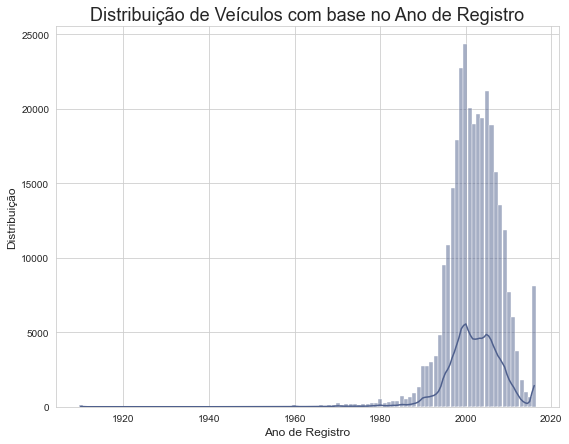

In [6]:
# Distribuição de veículos com base no ano de registro
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(9,7))
cor = '#4f608d'
sns.histplot(df['yearOfRegistration'], kde=True, shrink=4, ax=ax, color=cor)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize=18)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('Ano de Registro', fontsize=12)
plt.show()

> Podemos verificar que a distribuição de veículos com base no ano de registro, está concentrado em sua grande parte nos anos 2000. Observamos também que há uma distribuição normal nesse período.

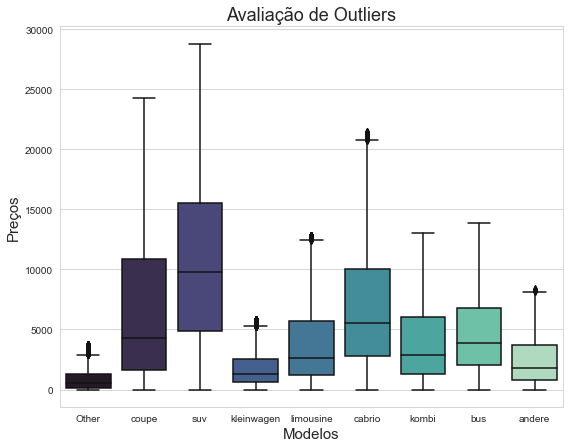

In [7]:
# Variação da faixa de preço pelo tipo de veículo
# usando boxplot para avaliar os outliers
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(data=df, x='vehicleType', y='price', palette="mako")
ax.set_title('Avaliação de Outliers', fontsize=18)
plt.ylabel('Preços', fontsize=15)
plt.xlabel('Modelos', fontsize=15)
plt.show()

> Podemos verificar alguns registros com outliers, esses registros fogem da média, observamos nos registros 'Other', 'Kleinwagen', 'Limousine', 'Cabrio', 'Andere'.

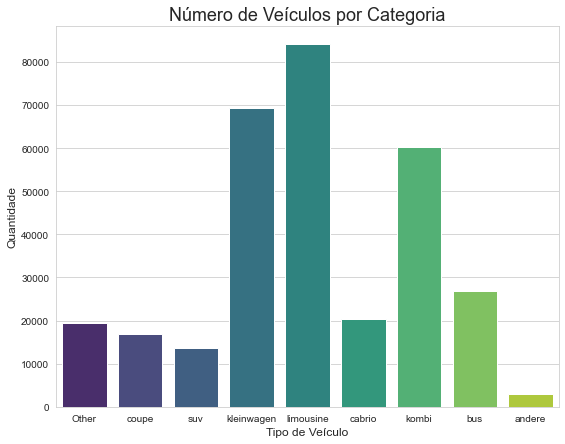

In [8]:
# Contagem total de veículos à venda conforme o tipo de veículo
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(9,7))
sns.countplot(data=df, x='vehicleType', palette="viridis")
ax.set_title('Número de Veículos por Categoria', fontsize=18)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Tipo de Veículo', fontsize=12)
plt.show()

> Verificamos aqui que os três tipos de veículos à venda que mais se destacam são o 'Kleinwagen', 'Limousine' e 'Kombi'.

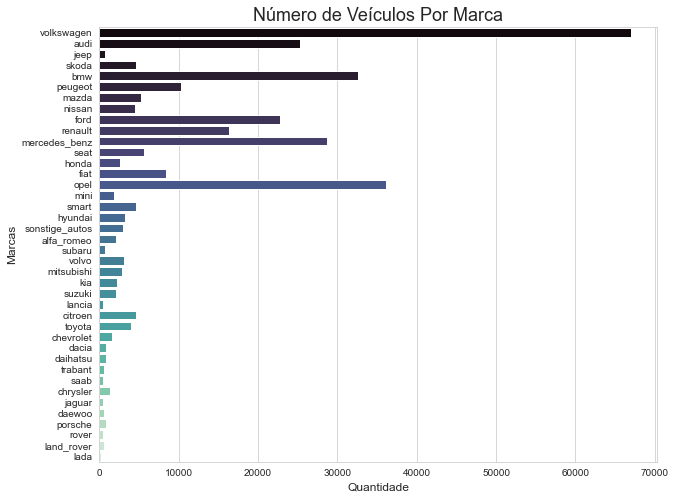

In [9]:
# Número de veículos pertencentes a cada marca
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df, y='brand', palette="mako")
ax.set_title('Número de Veículos Por Marca', fontsize=18)
plt.ylabel('Marcas', fontsize=12)
plt.xlabel('Quantidade', fontsize=12)
plt.show()

> Aqui verificamos que a maioria dos veículos são da marca 'Volkswagen'.


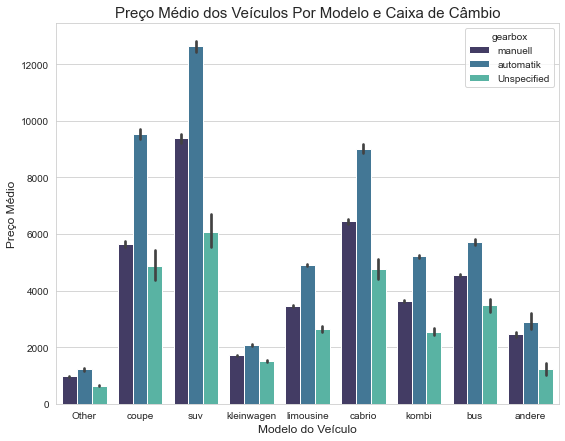

In [10]:
# Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
f, ax = plt.subplots(figsize=(9,7))
sns.barplot(data=df, y='price', x='vehicleType', hue='gearbox', palette='mako')
ax.set_title('Preço Médio dos Veículos Por Modelo e Caixa de Câmbio', fontsize=15)
plt.ylabel('Preço Médio', fontsize=12)
plt.xlabel('Modelo do Veículo', fontsize=12)
plt.show()

> Observamos que os veículos com câmbio automático tem a média de preço mais alta que os veículos com câmbio manual.

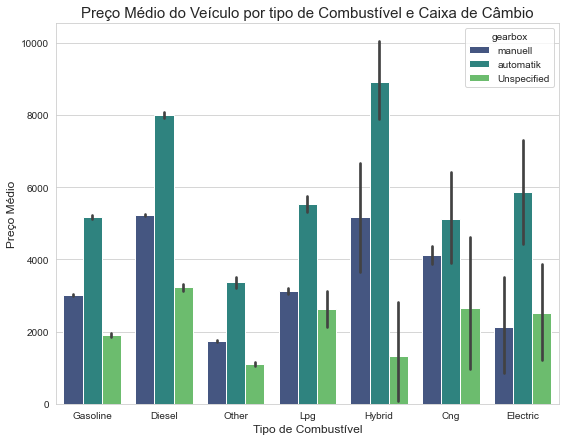

In [11]:
# Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
f, ax = plt.subplots(figsize=(9,7))
sns.barplot(data=df, y='price', x='fuelType', hue='gearbox', palette='viridis')
ax.set_title('Preço Médio do Veículo por tipo de Combustível e Caixa de Câmbio', fontsize=15)
plt.ylabel('Preço Médio', fontsize=12)
plt.xlabel('Tipo de Combustível', fontsize=12)
plt.show()

> Observamos que os veículos de câmbio automático tem a média de preço mais alta independente do tipo de combustível.


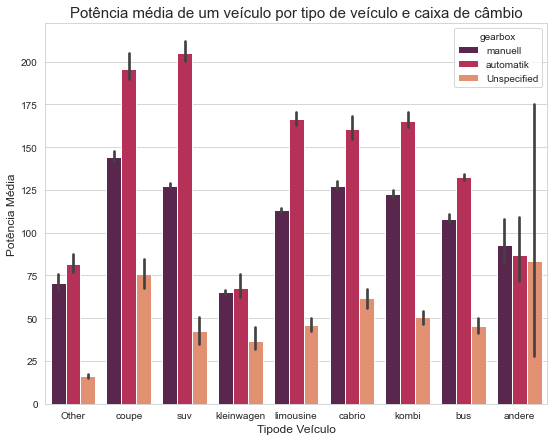

In [12]:
# Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
f, ax = plt.subplots(figsize=(9,7))
sns.barplot(data=df, y='powerPS', x='vehicleType', hue='gearbox', palette='rocket')
ax.set_title('Potência média de um veículo por tipo de veículo e caixa de câmbio', fontsize=15)
plt.ylabel('Potência Média', fontsize=12)
plt.xlabel('Tipode Veículo', fontsize=12)
plt.show()

> Aqui observamos que os modelos que têm câmbio automático apresentam mais potência.


In [14]:
# Média de preço por marca e por veículo
x = pd.DataFrame()
for i in list(df['brand'].unique()):
    for y in list(df['vehicleType'].unique()):
        j = df[(df['brand'] == i) & (df['vehicleType'] == y)]['price'].mean()
        x = x.append(pd.DataFrame({'brand':i, 'vehicleType':y, 'avgPrice':j}, index=[0]))
x = x.reset_index()
del x['index']
x['avgPrice'].fillna(0, inplace=True)
x['avgPrice'].isnull().value_counts()
x['avgPrice'] = x['avgPrice'].astype(int)
x

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
...,...,...,...
355,lada,limousine,2618
356,lada,cabrio,2500
357,lada,kombi,1278
358,lada,bus,3500


> Aqui verificamos que os veículos da marca Volkswagen e do tipo SUV são os que apresentam a maior média de preço.


> 

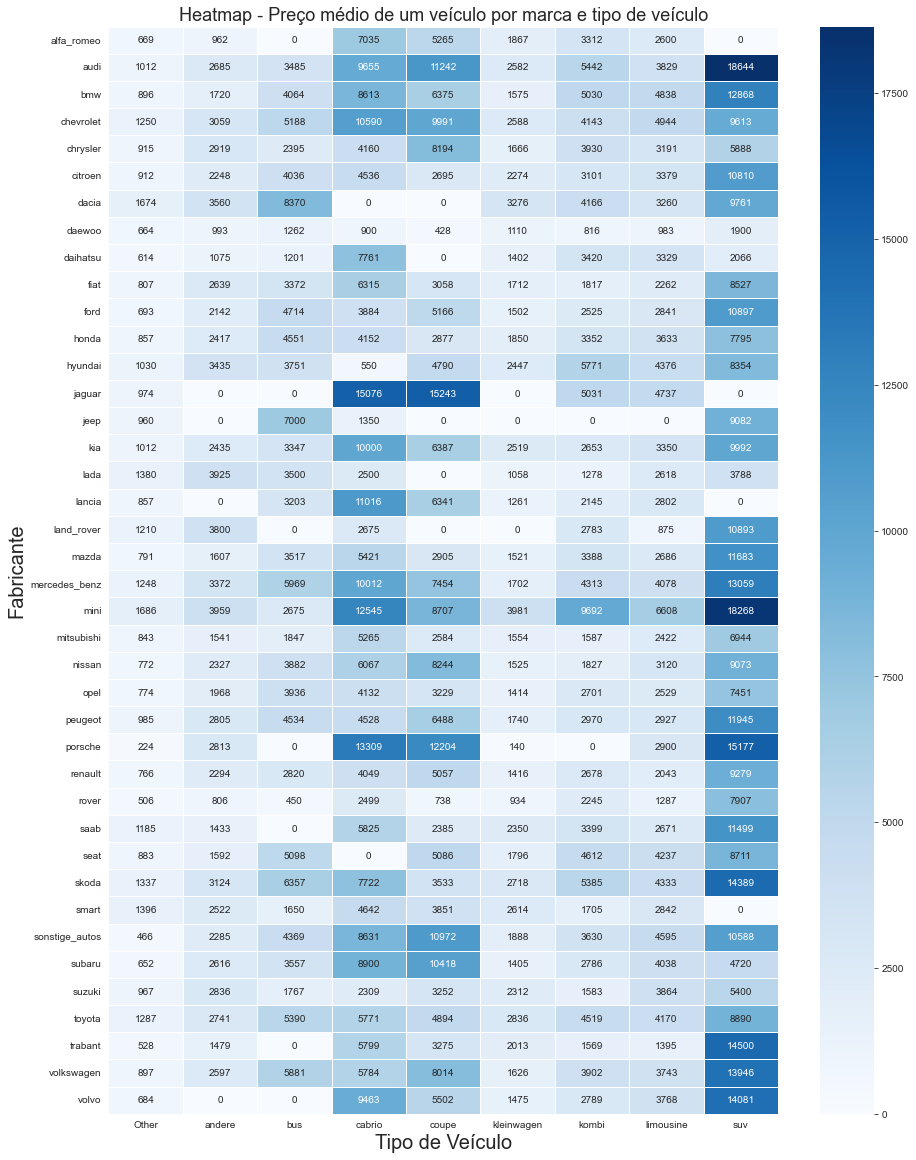

In [15]:
# Preço médio de um veículo por marca, bem como tipo de veículo
x1 = x.pivot("brand","vehicleType", "avgPrice")
f, ax = plt.subplots(figsize=(15,20))
sns.heatmap(x1, linewidths=1, cmap="Blues",annot=True, ax=ax, fmt="d")
ax.set_title('Heatmap - Preço médio de um veículo por marca e tipo de veículo', fontsize=18)
ax.xaxis.set_label_text('Tipo de Veículo', fontsize=20)
ax.yaxis.set_label_text('Fabricante', fontsize=20)
plt.show()

> Observando o heatmap, verificamos que os maiores preços são dos vaiculos das marcas Audi e Merceds Benz do tipo SUV.

# FIM